In [21]:
import numpy as np
from scipy.stats import gamma, uniform
from math import e, log, pi, sin, cos, asin, atan2, exp
import random

## Setup data
1. We use 300 random samples with a set random state to ensure we always get the same repro data.
2. We standard scale to ensure the same distance between different stats

In [22]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=0.60, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X, y_true)

In [24]:
import pandas as pd 

df = pd.DataFrame(X)
df.head()

,0,1
0,0.516255,-0.707227
1,-0.861664,1.329068
2,0.711174,0.437049
3,-0.619792,1.485573
4,0.782282,-0.801378


In [25]:
max_value = np.max(X)
max_value

2.1086182776480533

In [26]:
def rad_of_deg (ang): 
    return ang * pi / 180

def deg_of_rad (ang): 
    return ang * 180 / pi

def theta(): 
    return random.randint(0, 1) * pi * 2



In [53]:
def addVectorToPos(x, y, distance): 
    ang_distance = distance / max_value
    lat1 = rad_of_deg(y)
    lon1 = rad_of_deg(x)
    print(lon1)
    angle = theta()

    lat2 =	asin(sin(lat1) * cos(ang_distance) + cos(lat1) * sin(ang_distance) * cos(angle))
    lon2 =	lon1 +atan2(sin(angle) * sin(ang_distance) * cos(lat1), cos(ang_distance) - sin(lat1) * sin(lat2))
    lon2 = (lon2 + 3 * pi) % (2 * pi) - pi
    print(lon2)
    return { 
        'y': deg_of_rad(lat2),
        'x': deg_of_rad(lon2)
	}

In [59]:
print(df.iloc[0, 0], df.iloc[0, 1])

0.516255078471987 -0.7072272278864006


In [60]:
testVector = addVectorToPos(df.iloc[0, 0], df.iloc[0, 1], 1)
testVector

0.009010350899477871
0.009010350899478325


{'y': 26.464964211613907, 'x': 0.5162550784720131}

## Visualize

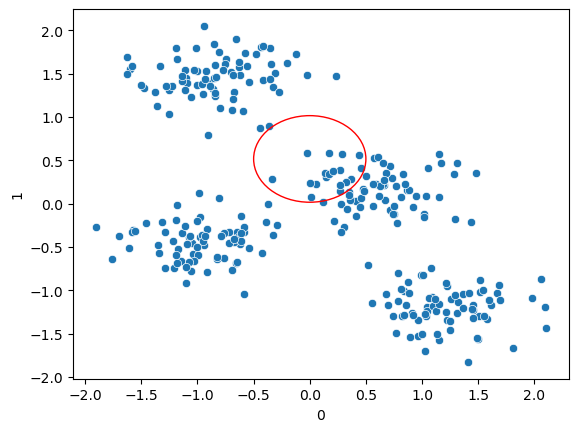

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


# Plot the data as a scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])

# Choose a point and a radius
center = (0, testVector['x'])
radius = 0.5

# Draw a circle around the chosen point
circle = plt.Circle(center, radius, color='r', fill=False)
plt.gca().add_artist(circle)

plt.show()